In [28]:
from obspy.core import Stream, read
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
import matplotlib.colors as colors
from matplotlib.colors import Normalize
import pandas as pd
import os 
import os.path

In [40]:
path = '/Users/sydneydybing/StrainProject/2024/taiwan_strain_data/'
high_xlim_sec = 60
events = pd.read_csv(path + 'events_csv.csv')
snr_array = pd.read_csv(path + 'station_data_hypdists_snrs.csv')
snr_array

,Sta,Lat,Lon,Depth(m),2009_hyp_dist_km,2013_hyp_dist_km,2018_hyp_dist_km,snrs_2009,snrs_2013,snrs_2018
0,BCWB,24.2184,121.6891,-192,69.496535,74.182696,7.066640,-,-,-
1,TRKB,24.1614,121.6127,-192,61.088805,65.767547,9.697232,-,1152.20250487,3719.0718215
2,NTTB,24.1728,121.5259,-175,60.587926,65.180780,18.587874,-,-,-
3,SJNB,24.1073,121.6006,-193,54.988063,59.668808,12.226300,-,1534.07924347,130.500478359
4,HGSB,23.4903,121.4237,-266,15.739505,11.125139,79.319331,-,439.289654937,372.018353576
5,CHMB,23.4868,121.4703,-191,15.969342,11.924641,78.079695,-,348.253341927,40.3376474275
6,SSNB,23.4423,121.3981,-185,21.504342,16.833483,85.224271,-,766.890947625,129.005945014
7,ZANB,23.3947,121.4585,-218,26.068219,21.740867,88.175343,-,3295.27964074,106.461336916
8,FBRB,23.1406,121.2796,-200,56.994188,52.307853,120.756809,-,410.300738921,80.3548941939
9,SSTB,23.1340,121.3782,-199,55.447392,50.858196,118.191393,-,359.179515365,47.0870229521


### Plot by event (rainbow for hypdist)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


2009-10-03_M6.1
BCWB
TRKB
NTTB
SJNB
HGSB
CHMB
SSNB
ZANB
FBRB
SSTB
DONB


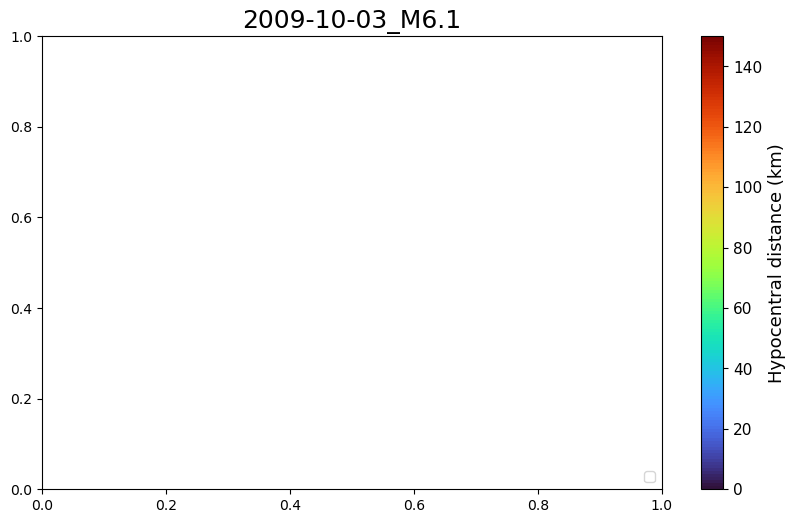

2013-10-31_M6.3
BCWB
TRKB
NTTB
SJNB
HGSB
CHMB
SSNB
ZANB
FBRB
SSTB
DONB


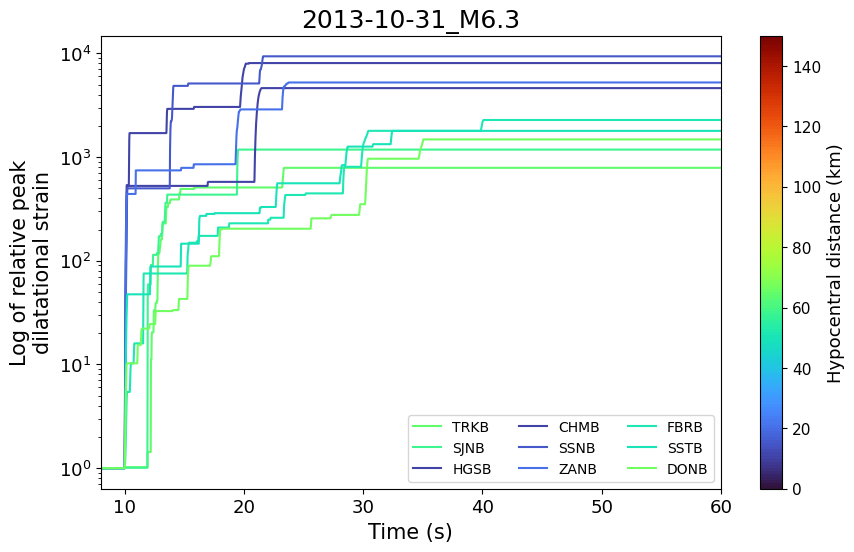

2018-02-04_M6.1
BCWB
TRKB
NTTB
SJNB
HGSB
CHMB
SSNB
ZANB
FBRB
SSTB
DONB


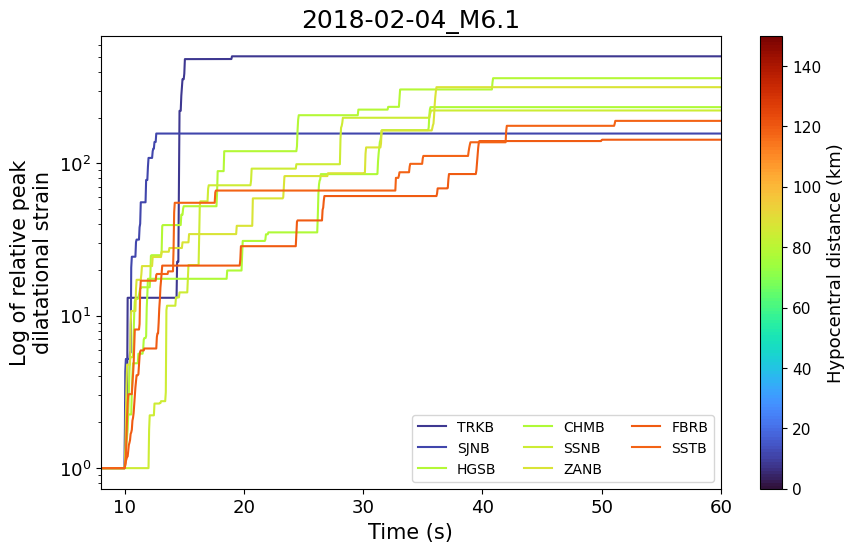

In [36]:
cmap = plt.get_cmap('turbo', 150) 

# For non-abs peak strain

for i in range(len(events)):
    
    fig = plt.figure(figsize = (10,6), dpi = 100, facecolor = 'white', num = 1, clear = True)
    ax = fig.add_subplot(111)
    
    evt_id = events['evt_id'][i]
    print(evt_id)
    # origin_time = UTCDateTime(events['origin_time'][i])
    # print(origin_time)

    for idx in range(len(snr_array)):

        sta = snr_array['Sta'][idx]
        
        if evt_id == '2009-10-03_M6.1':
            hypdist = snr_array['2009_hyp_dist_km'][idx]
        elif evt_id == '2013-10-31_M6.3':
            hypdist = snr_array['2013_hyp_dist_km'][idx]
        elif evt_id == '2018-02-04_M6.1':
            hypdist = snr_array['2018_hyp_dist_km'][idx]
        
        int_hypdist = int(hypdist)
        print(sta)
        # plt.figure(figsize = (10,6), dpi = 300, facecolor = 'white', num = 1, clear = True)

        # Strain data
        try:
            pst = read(path + 'filtered_peak_post_p/' + evt_id + '/' + sta + '.mseed')
            # pst.plot()
            # apst = read(path + 'filtered_abs_peak_post_p/' + evt_id + '/' + sta + '.mseed')
        except:
            continue

        low_xlim_sec = 8
        high_xlim_sec = high_xlim_sec    
            
        # Peak strain data

        pst_times = pst[0].times()
        pst_data = pst[0].data
        samp_rate = pst[0].stats.sampling_rate
        low_xlim_samp = int(low_xlim_sec * samp_rate)
        high_xlim_samp = int(high_xlim_sec * samp_rate)

        # Move the flat line at the beginning of each timeseries to the same level

        norm_data = np.copy(pst_data)
        norm_level = pst_data[0]
    #         print(norm_level)
        norm_data = norm_data - norm_level + 1 # Subtract the starting value, add 10^-9 to set at 10^0 on nanostrain plot

        # Plot stations       
        # ax.plot(pst_times, pst_data*10**9, color = cmap(int_hypdist-1), label = sta)
        ax.plot(pst_times[low_xlim_samp:high_xlim_samp], norm_data[low_xlim_samp:high_xlim_samp], color = cmap(int_hypdist-1), label = sta)
        ax.set_yscale('log')
        ax.set_ylabel('Log of relative peak\ndilatational strain', fontsize = 15)
        ax.set_xlabel('Time (s)', fontsize = 15)
        ax.set_xlim(low_xlim_sec,high_xlim_sec)
        if high_xlim_sec <= 30:
            ax.axvline(x = 10, color = 'gray', linestyle = '--', alpha = 0.5)
        ax.tick_params(labelsize = 13)

    ax.set_title(evt_id, fontsize = 18)
    cbar = fig.colorbar(plt.cm.ScalarMappable(norm = Normalize(0, 150), cmap = cmap), ax = ax)
    cbar.ax.tick_params(labelsize = 11)
    cbar.ax.set_ylabel(ylabel = 'Hypocentral distance (km)', fontsize = 13)
    ax.legend(loc = 'lower right', ncol = 3, fontsize = 10)

    plt.show();

#     # Create folder for the event
#     fig_save_dir = path_to_files + 'figures/filtered_peak_strain_plots/NA_M6_500km/leveled_at_p_arrival/by_event_cmap_hypdist/' + str(high_xlim_sec) + 's_limit/'
# #         print(fig_save_dir)
#     if os.path.isdir(fig_save_dir):
#         pass
#     else:
#         os.makedirs(fig_save_dir)

#     plt.savefig(fig_save_dir + str(eq_id) + '.png', format = 'PNG')
#     plt.close();


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


2009-10-03_M6.1
BCWB
TRKB
NTTB
SJNB
HGSB
CHMB
SSNB
ZANB
FBRB
SSTB
DONB


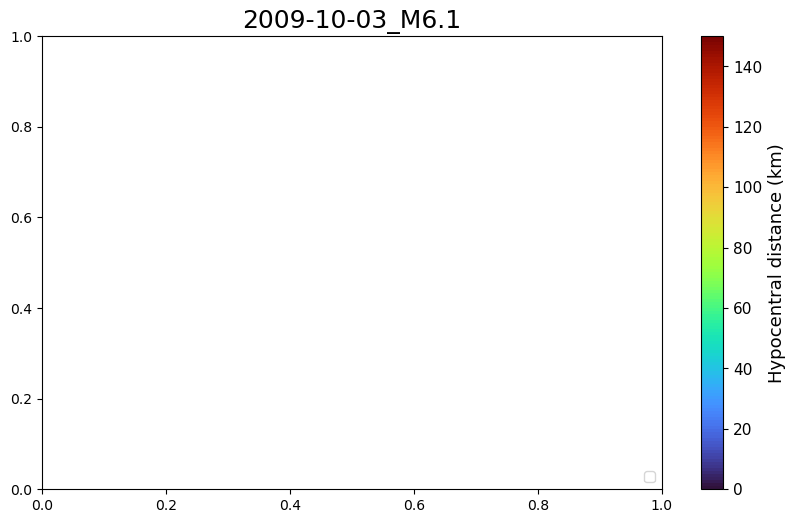

2013-10-31_M6.3
BCWB
TRKB
NTTB
SJNB
HGSB
CHMB
SSNB
ZANB
FBRB
SSTB
DONB


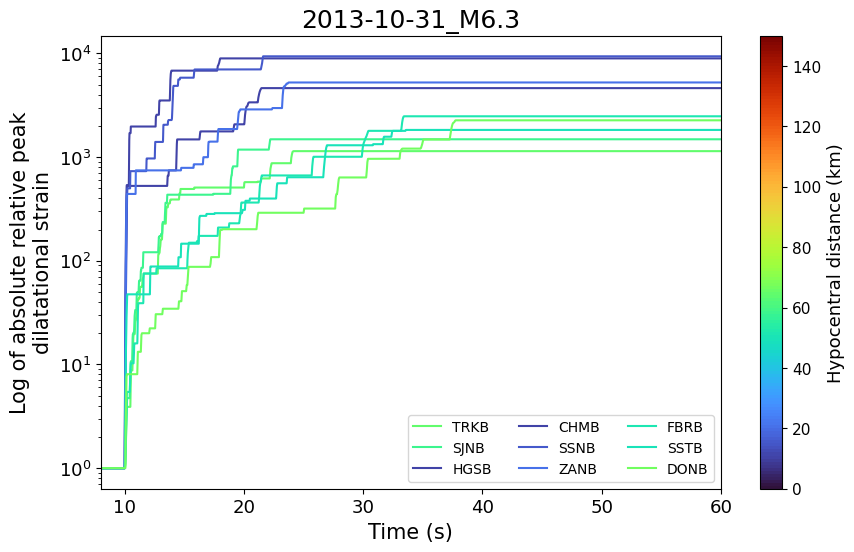

2018-02-04_M6.1
BCWB
TRKB
NTTB
SJNB
HGSB
CHMB
SSNB
ZANB
FBRB
SSTB
DONB


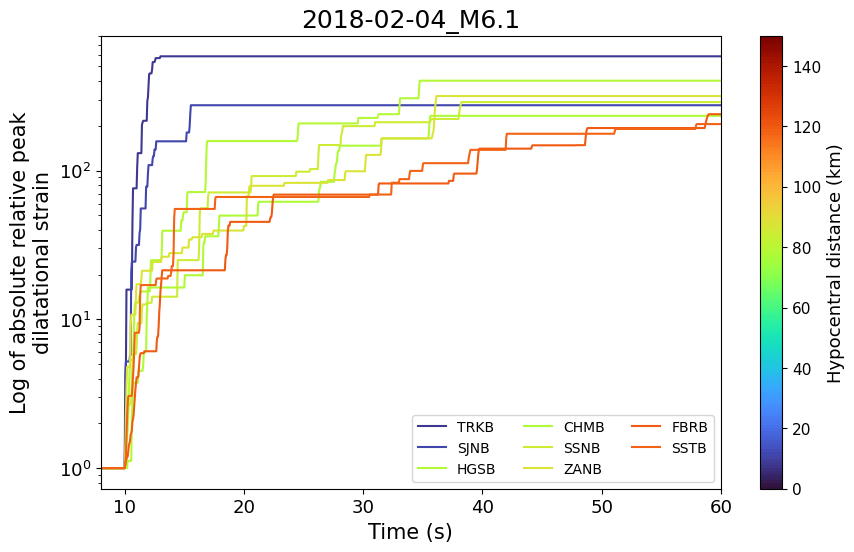

In [41]:
cmap = plt.get_cmap('turbo', 150) 

# For abs peak strain

for i in range(len(events)):
    
    fig = plt.figure(figsize = (10,6), dpi = 100, facecolor = 'white', num = 1, clear = True)
    ax = fig.add_subplot(111)
    
    evt_id = events['evt_id'][i]
    print(evt_id)
    # origin_time = UTCDateTime(events['origin_time'][i])
    # print(origin_time)

    for idx in range(len(snr_array)):

        sta = snr_array['Sta'][idx]
        
        if evt_id == '2009-10-03_M6.1':
            hypdist = snr_array['2009_hyp_dist_km'][idx]
        elif evt_id == '2013-10-31_M6.3':
            hypdist = snr_array['2013_hyp_dist_km'][idx]
        elif evt_id == '2018-02-04_M6.1':
            hypdist = snr_array['2018_hyp_dist_km'][idx]
        
        int_hypdist = int(hypdist)
        print(sta)
        # plt.figure(figsize = (10,6), dpi = 300, facecolor = 'white', num = 1, clear = True)

        # Strain data
        try:
            pst = read(path + 'filtered_abs_peak_post_p/' + evt_id + '/' + sta + '.mseed')
            # pst.plot()
            # apst = read(path + 'filtered_abs_peak_post_p/' + evt_id + '/' + sta + '.mseed')
        except:
            continue

        low_xlim_sec = 8
        high_xlim_sec = high_xlim_sec    
            
        # Peak strain data

        pst_times = pst[0].times()
        pst_data = pst[0].data
        samp_rate = pst[0].stats.sampling_rate
        low_xlim_samp = int(low_xlim_sec * samp_rate)
        high_xlim_samp = int(high_xlim_sec * samp_rate)

        # Move the flat line at the beginning of each timeseries to the same level

        norm_data = np.copy(pst_data)
        norm_level = pst_data[0]
    #         print(norm_level)
        norm_data = norm_data - norm_level + 1 # Subtract the starting value, add 10^-9 to set at 10^0 on nanostrain plot
        
        # Plot stations
        # ax.plot(pst_times, pst_data*10**9, color = cmap(int_hypdist-1), label = sta)
        ax.plot(pst_times[low_xlim_samp:high_xlim_samp], norm_data[low_xlim_samp:high_xlim_samp], color = cmap(int_hypdist-1), label = sta)
        ax.set_yscale('log')
        ax.set_ylabel('Log of absolute relative peak\ndilatational strain', fontsize = 15)
        ax.set_xlabel('Time (s)', fontsize = 15)
        ax.set_xlim(low_xlim_sec,high_xlim_sec)
        if high_xlim_sec <= 30:
            ax.axvline(x = 10, color = 'gray', linestyle = '--', alpha = 0.5)
        ax.tick_params(labelsize = 13)

    ax.set_title(evt_id, fontsize = 18)
    cbar = fig.colorbar(plt.cm.ScalarMappable(norm = Normalize(0, 150), cmap = cmap), ax = ax)
    cbar.ax.tick_params(labelsize = 11)
    cbar.ax.set_ylabel(ylabel = 'Hypocentral distance (km)', fontsize = 13)
    ax.legend(loc = 'lower right', ncol = 3, fontsize = 10)

    plt.show();

#     # Create folder for the event
#     fig_save_dir = path_to_files + 'figures/filtered_peak_strain_plots/NA_M6_500km/leveled_at_p_arrival/by_event_cmap_hypdist/' + str(high_xlim_sec) + 's_limit/'
# #         print(fig_save_dir)
#     if os.path.isdir(fig_save_dir):
#         pass
#     else:
#         os.makedirs(fig_save_dir)

#     plt.savefig(fig_save_dir + str(eq_id) + '.png', format = 'PNG')
#     plt.close();


2009-10-03_M6.1
BCWB
TRKB
NTTB
SJNB
HGSB
CHMB
SSNB
ZANB
FBRB
SSTB
DONB
2013-10-31_M6.3
BCWB
TRKB


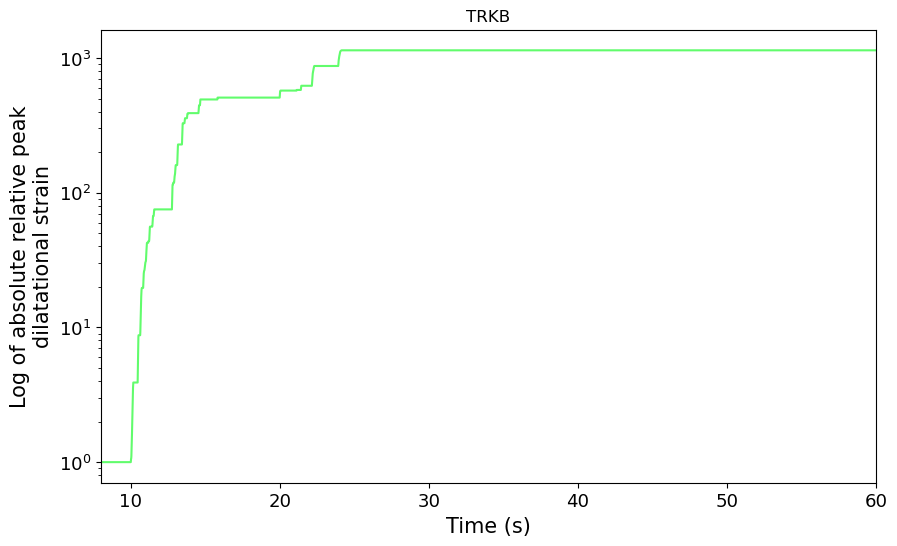

NTTB
SJNB


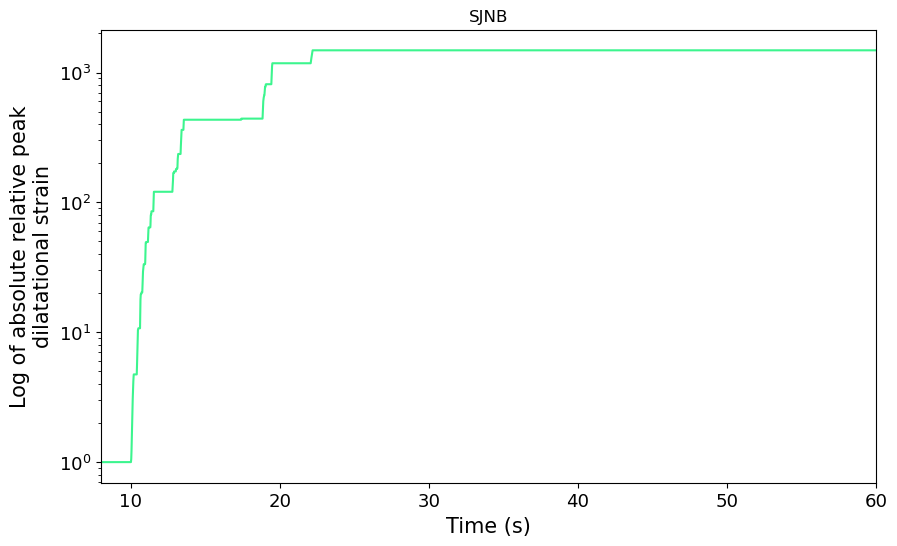

HGSB


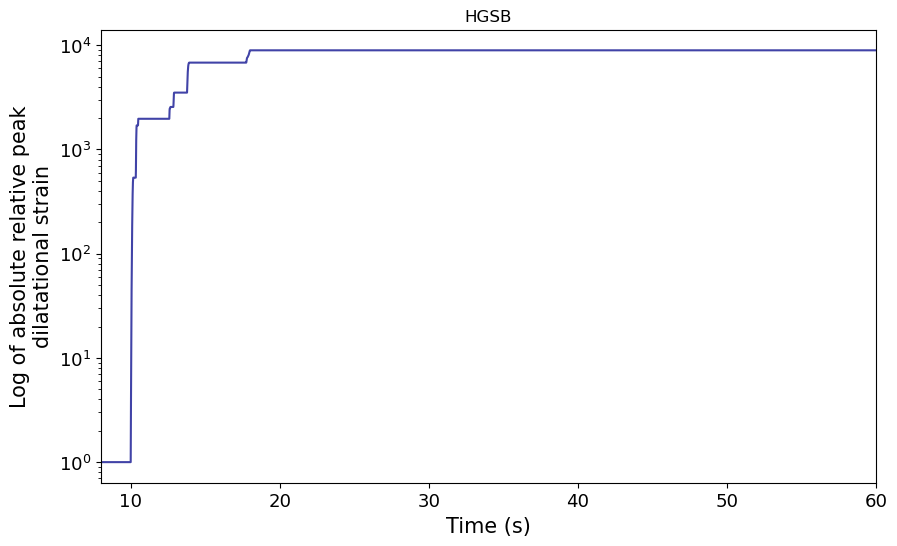

CHMB


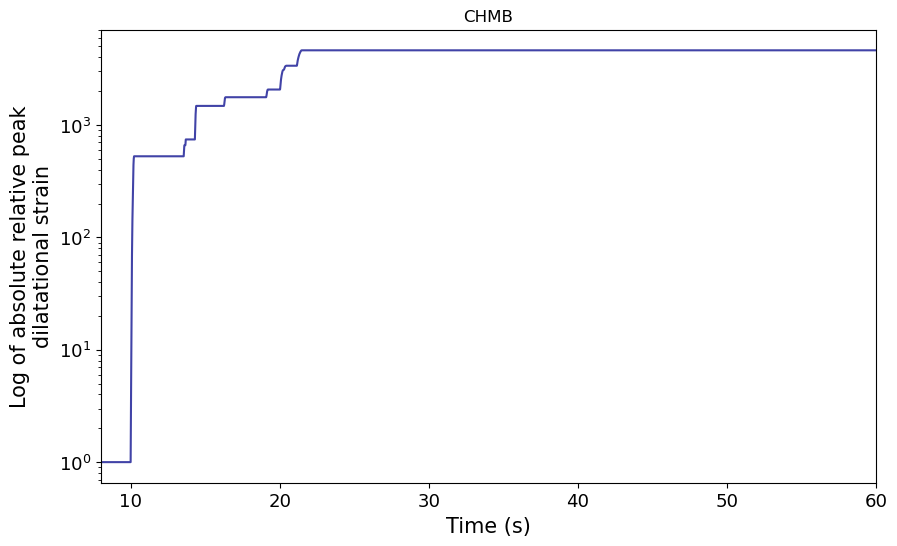

SSNB


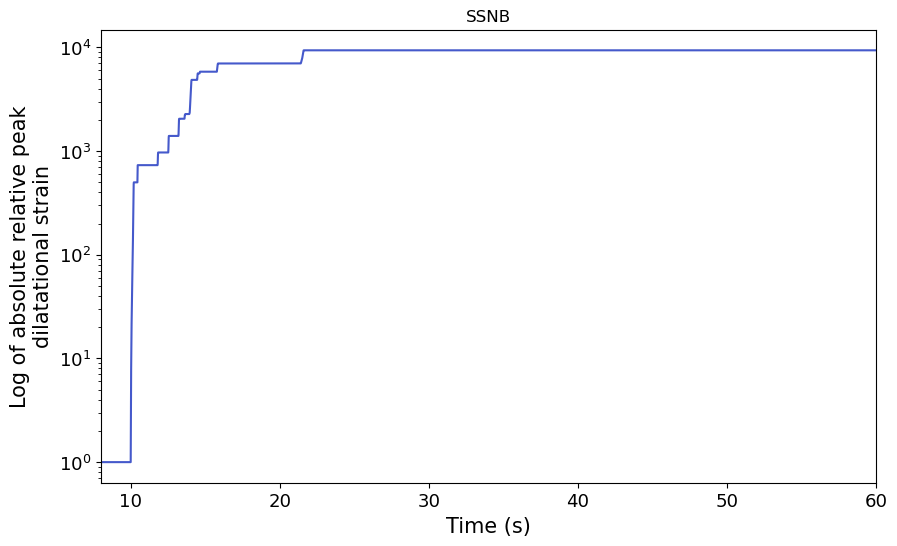

ZANB


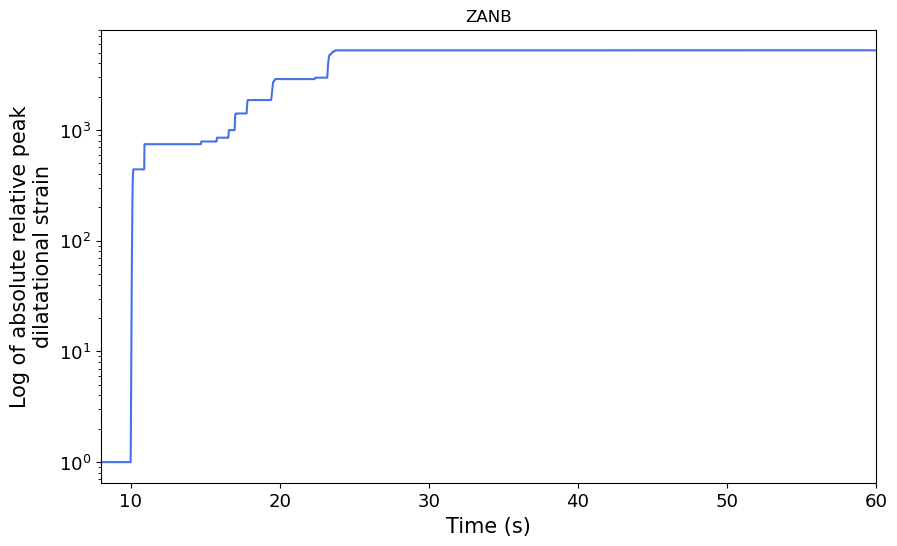

FBRB


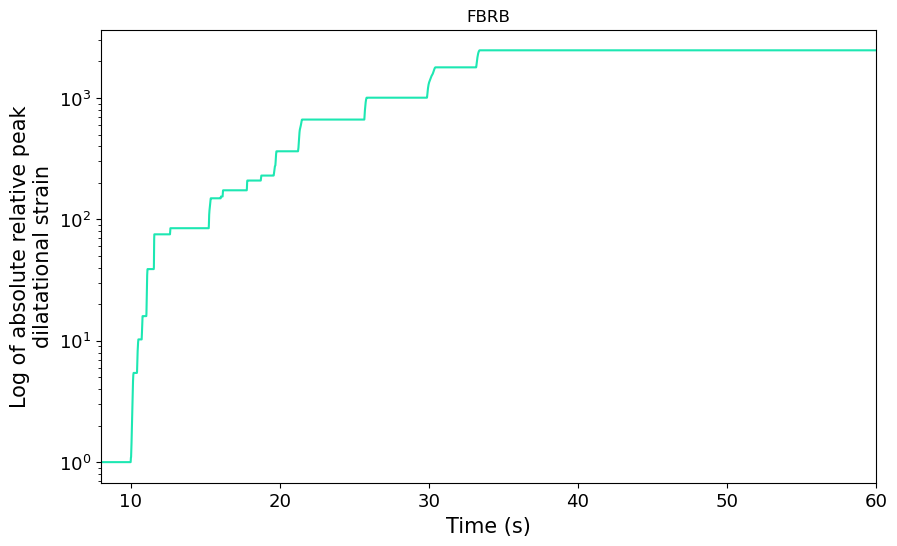

SSTB


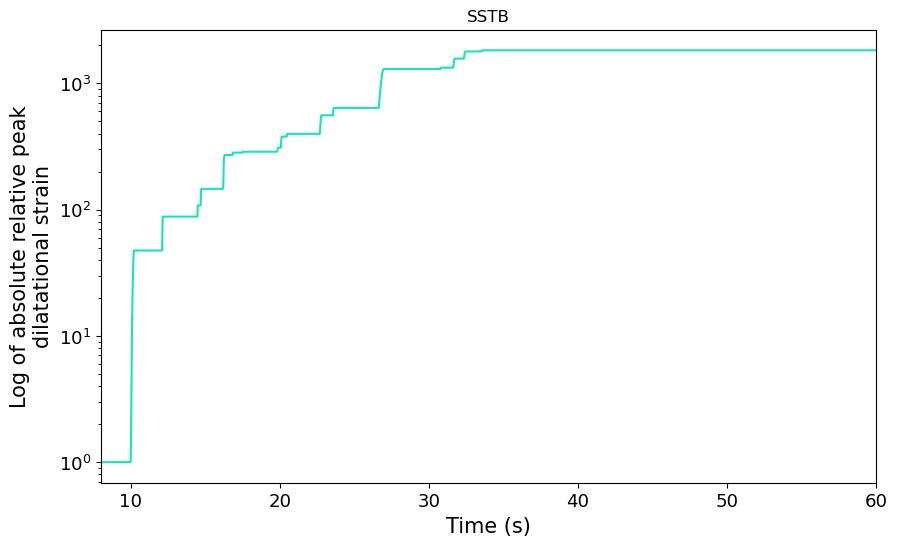

DONB


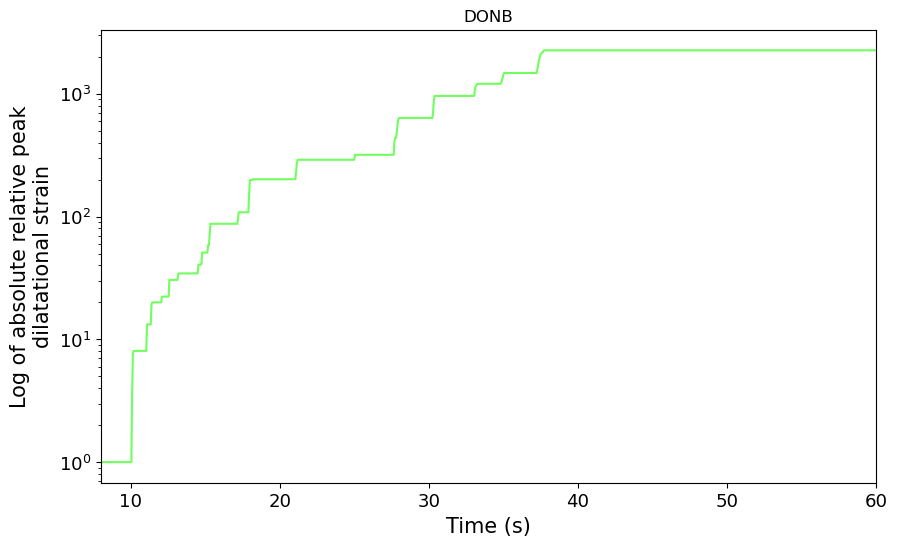

2018-02-04_M6.1
BCWB
TRKB


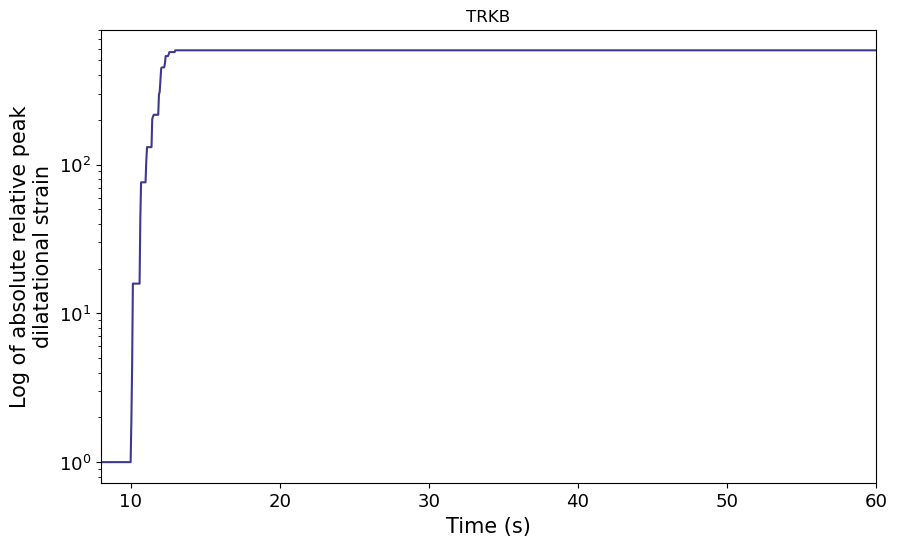

NTTB
SJNB


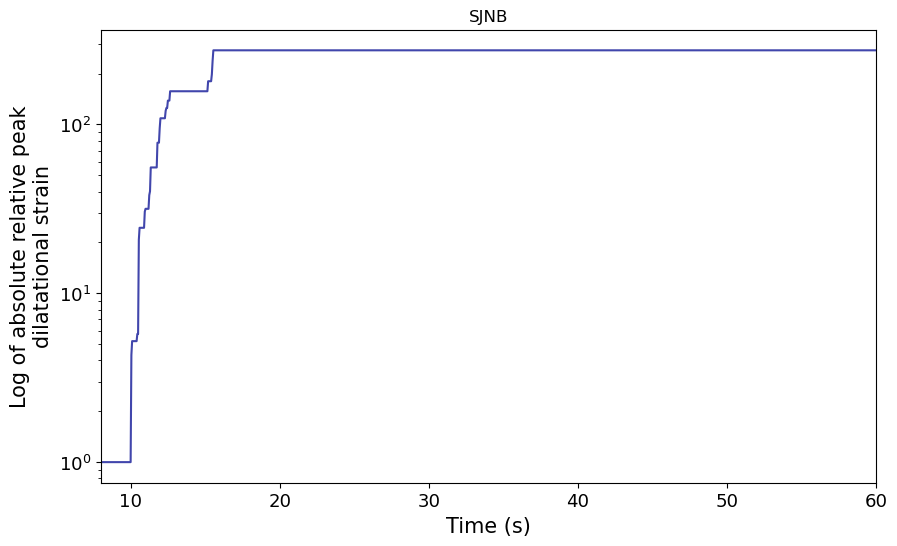

HGSB


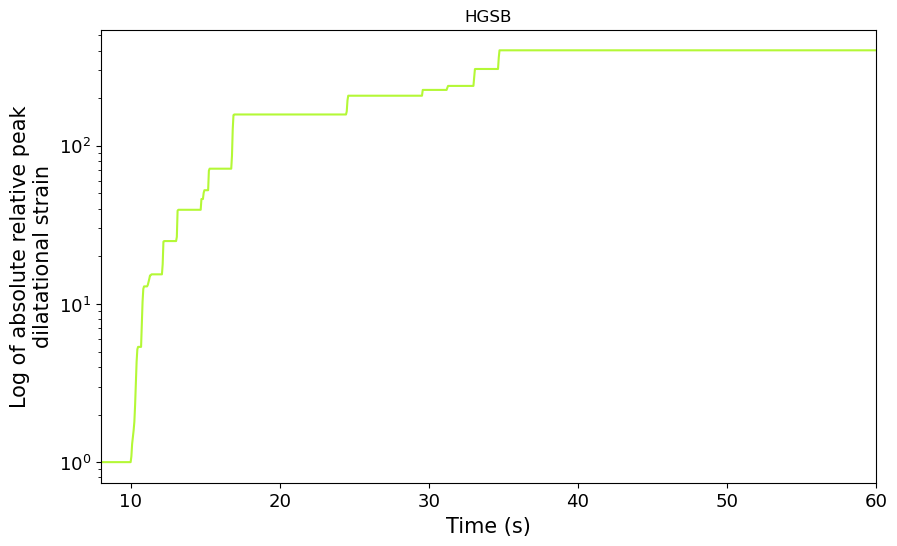

CHMB


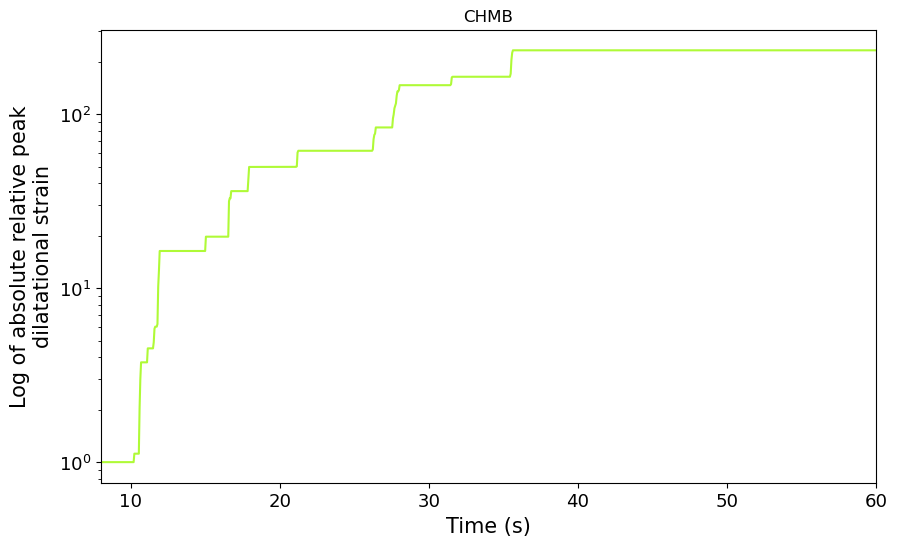

SSNB


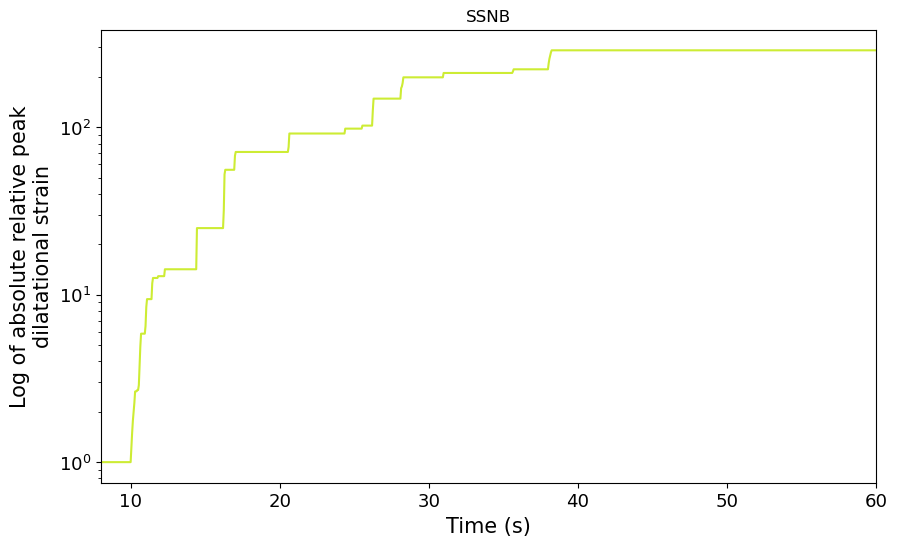

ZANB


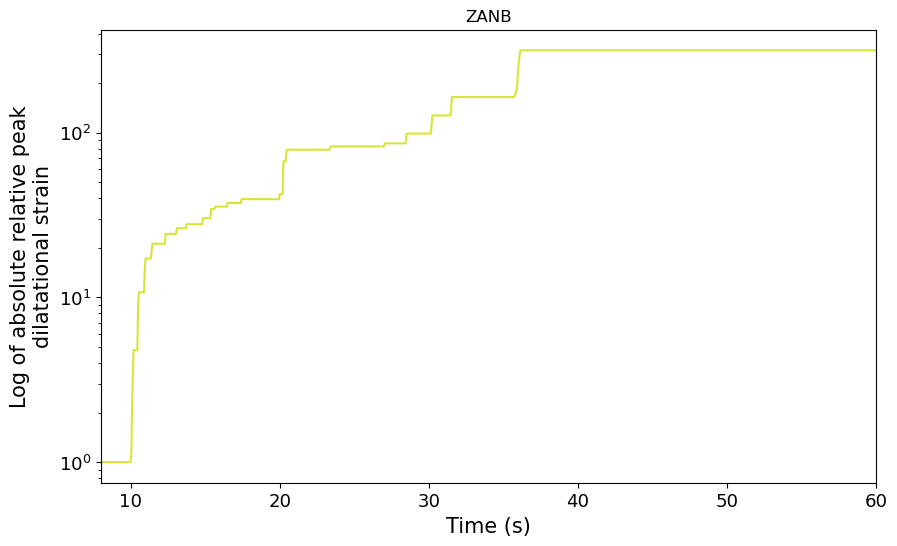

FBRB


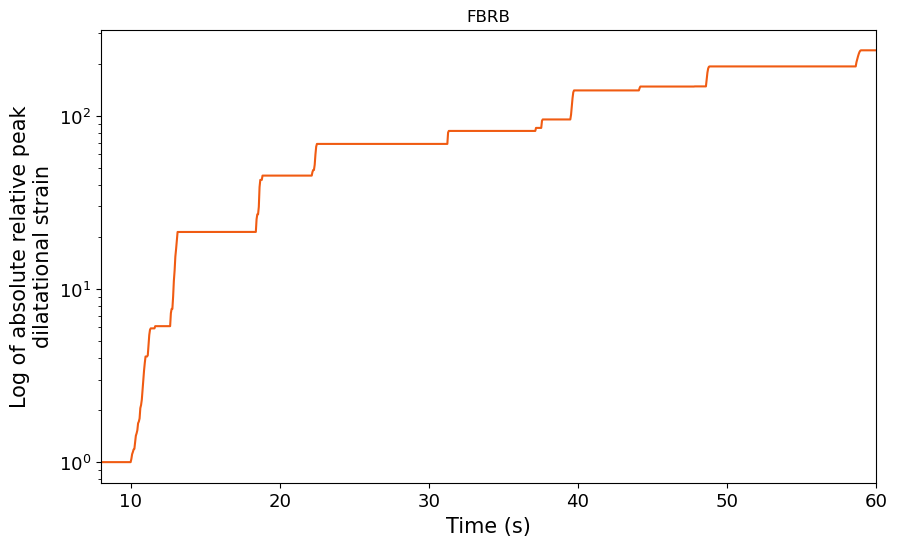

SSTB


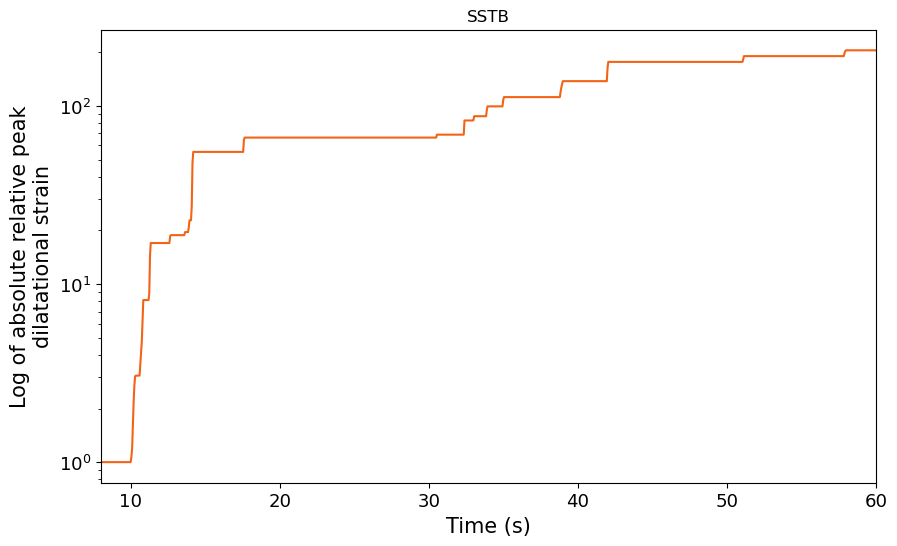

DONB


In [45]:
cmap = plt.get_cmap('turbo', 150) 

# Plot individual stations

for i in range(len(events)):
    
    evt_id = events['evt_id'][i]
    print(evt_id)
    # origin_time = UTCDateTime(events['origin_time'][i])
    # print(origin_time)

    for idx in range(len(snr_array)):

        sta = snr_array['Sta'][idx]
        
        if evt_id == '2009-10-03_M6.1':
            hypdist = snr_array['2009_hyp_dist_km'][idx]
        elif evt_id == '2013-10-31_M6.3':
            hypdist = snr_array['2013_hyp_dist_km'][idx]
        elif evt_id == '2018-02-04_M6.1':
            hypdist = snr_array['2018_hyp_dist_km'][idx]
        
        int_hypdist = int(hypdist)
        print(sta)
        # plt.figure(figsize = (10,6), dpi = 300, facecolor = 'white', num = 1, clear = True)

        # Strain data
        try:
            pst = read(path + 'filtered_abs_peak_post_p/' + evt_id + '/' + sta + '.mseed')
            # pst.plot()
            # apst = read(path + 'filtered_abs_peak_post_p/' + evt_id + '/' + sta + '.mseed')
        except:
            continue

        low_xlim_sec = 8
        high_xlim_sec = high_xlim_sec    
            
        # Peak strain data

        pst_times = pst[0].times()
        pst_data = pst[0].data
        samp_rate = pst[0].stats.sampling_rate
        low_xlim_samp = int(low_xlim_sec * samp_rate)
        high_xlim_samp = int(high_xlim_sec * samp_rate)

        # Move the flat line at the beginning of each timeseries to the same level

        norm_data = np.copy(pst_data)
        norm_level = pst_data[0]
    #         print(norm_level)
        norm_data = norm_data - norm_level + 1 # Subtract the starting value, add 10^-9 to set at 10^0 on nanostrain plot
        
        # Plot stations
        fig = plt.figure(figsize = (10,6), dpi = 100, facecolor = 'white', num = 1, clear = True)
        ax = fig.add_subplot(111)
        ax.set_title(sta)
        # ax.plot(pst_times, pst_data*10**9, color = cmap(int_hypdist-1), label = sta)
        ax.plot(pst_times[low_xlim_samp:high_xlim_samp], norm_data[low_xlim_samp:high_xlim_samp], color = cmap(int_hypdist-1), label = sta)
        ax.set_yscale('log')
        ax.set_ylabel('Log of absolute relative peak\ndilatational strain', fontsize = 15)
        ax.set_xlabel('Time (s)', fontsize = 15)
        ax.set_xlim(low_xlim_sec,high_xlim_sec)
        if high_xlim_sec <= 30:
            ax.axvline(x = 10, color = 'gray', linestyle = '--', alpha = 0.5)
        ax.tick_params(labelsize = 13)

    # ax.set_title(evt_id, fontsize = 18)
    # cbar = fig.colorbar(plt.cm.ScalarMappable(norm = Normalize(0, 150), cmap = cmap), ax = ax)
    # cbar.ax.tick_params(labelsize = 11)
    # cbar.ax.set_ylabel(ylabel = 'Hypocentral distance (km)', fontsize = 13)
    # ax.legend(loc = 'lower right', ncol = 3, fontsize = 10)

        plt.show();

#     # Create folder for the event
#     fig_save_dir = path_to_files + 'figures/filtered_peak_strain_plots/NA_M6_500km/leveled_at_p_arrival/by_event_cmap_hypdist/' + str(high_xlim_sec) + 's_limit/'
# #         print(fig_save_dir)
#     if os.path.isdir(fig_save_dir):
#         pass
#     else:
#         os.makedirs(fig_save_dir)

#     plt.savefig(fig_save_dir + str(eq_id) + '.png', format = 'PNG')
#     plt.close();


199
9.95


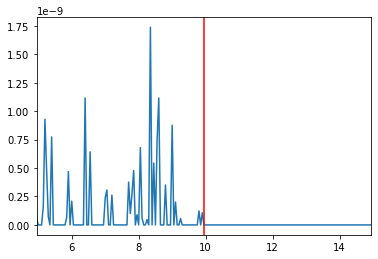

250
12.5


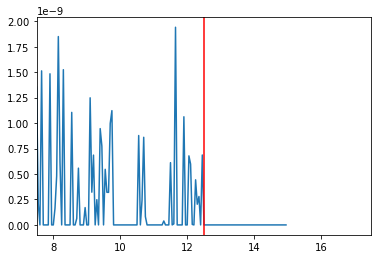

195
9.75


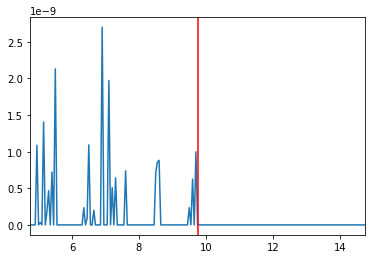

234
11.7


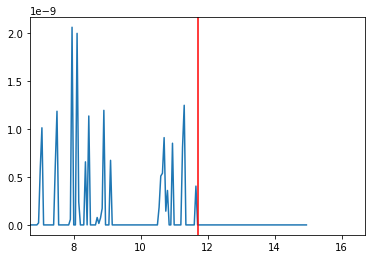

227
11.35


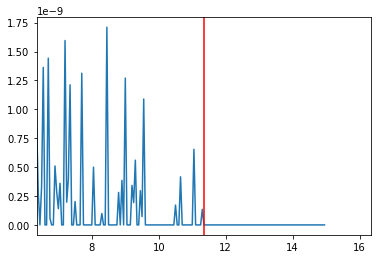

225
11.25


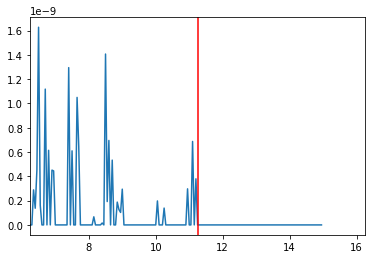

169
8.45


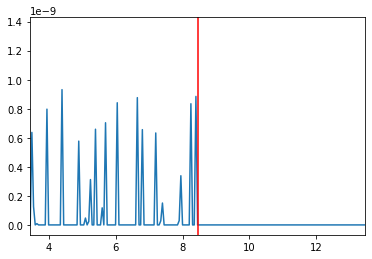

221
11.05


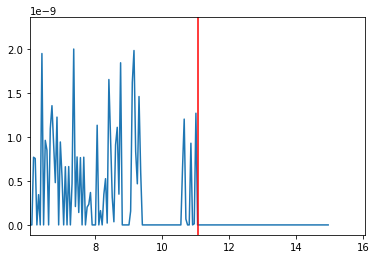

In [38]:
# Find where each station flattens out 

flat_times = []

for i in range(len(snr_array)):

    sta = snr_array['Station_name'][i]

    # Peak strain data
    pst = read(path + 'filtered_peak_post_p/' + str(sta) + '.mseed')
    # pst.plot()
    
    old_start = pst[0].stats.starttime
    new_start = old_start + 10
    new_end = old_start + 25
    
    trim_pst = pst.trim(starttime = new_start, endtime = new_end, pad = True, fill_value = 0)
    # trim_pst.plot()
    
    diff_trim = np.diff(trim_pst[0].data)
    diff_times = pst[0].times()[:-1]
    
    j = np.where(diff_trim != 0)[0]
    flat_start_idx = j[-1]+1
    print(flat_start_idx)
    flat_start_time = diff_times[flat_start_idx]
    print(flat_start_time)
    
    plt.plot(diff_times, diff_trim)
    plt.axvline(flat_start_time, color = 'red')
    plt.xlim(flat_start_time-5, flat_start_time+5)
    plt.show()
    
    flat_times.append(flat_start_time)
    
snr_array['flat_start_secs_after_p'] = flat_times   
    

In [39]:
snr_array

,Station_name,latitude,longitude,azimuth(S1),azimuth(S2),azimuth(S3),azimuth(S4),hyp_dist_km,rms_snr,flat_start_secs_after_p
0,KST1,33.5201,135.8363,310,40,85,175,792.746765,1.273396,9.95
1,HGM1,33.8675,135.7318,337,67,112,202,773.809644,1.139778,12.50
2,ICU1,33.9001,136.1379,141,231,276,6,743.491829,1.203692,9.75
3,ANO1,34.7870,136.4019,38,128,173,263,661.251185,1.113420,11.70
4,SSK1,33.3896,133.3229,355,85,130,220,981.546244,1.285971,11.35
5,UWA1,33.3859,132.4823,222,312,357,87,1045.683453,1.282839,11.25
6,MUR1,33.2856,134.1563,147,237,282,12,927.200827,1.258307,8.45
7,MYM1,34.1123,136.1815,237,327,12,102,724.694237,1.134499,11.05


In [40]:
snr_array.to_csv(path + 'stations_hypdists_snrs_flatsecs.list', index = False)

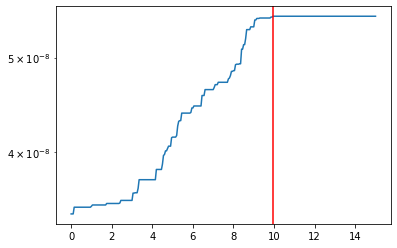

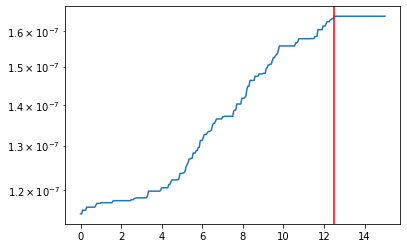

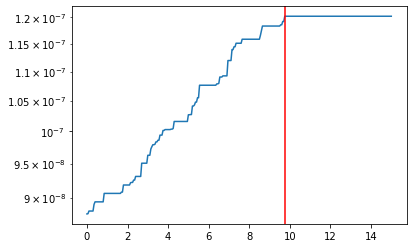

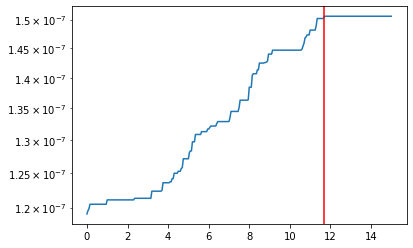

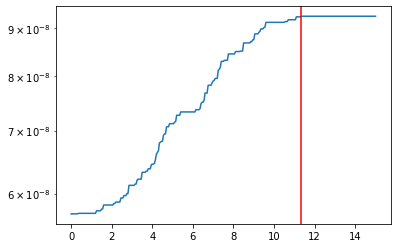

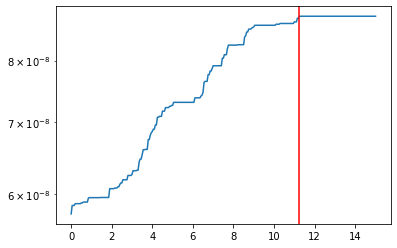

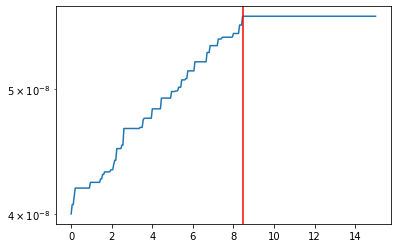

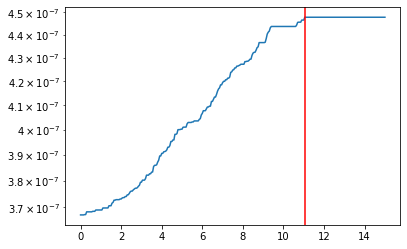

In [41]:
for i in range(len(snr_array)):

    sta = snr_array['Station_name'][i]
    trans_time = snr_array['flat_start_secs_after_p'][i]

    # Peak strain data
    pst = read(path + 'filtered_peak_post_p/' + str(sta) + '.mseed')
    # pst.plot()
    
    old_start = pst[0].stats.starttime
    new_start = old_start + 10
    new_end = old_start + 25
    
    trim_pst = pst.trim(starttime = new_start, endtime = new_end, pad = True, fill_value = 0)
    
    plt.plot(trim_pst[0].times(), trim_pst[0].data)
    plt.axvline(trans_time, color = 'red')
    plt.semilogy()
    plt.show()